# Udacity Project - Communicate data findings
## by Patrick Schütze

## Investigation Overview

> This presentation will be mainly focusing on show the role of the borrowers rate and analyze the relationship to other variables. The main characterics are BorrowerRate, ProsperScore and ProsperRating (Alpha)


## Dataset Overview

> The dataset contains 26 columns and 113,917 loans. Each row contains information about the borrower and the loan. The dataset was alrealy cleaned before and missing values were dropped. The upcoming diagrams will analyze factors that could influence the borrowers rate.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the dataset into a pandas dataframe
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,ListingCategory,OriginationRate,OriginationFee
0,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,0.12016,0.0920,0.0820,0.0249,0.05470,6.0,...,"$50,000-74,999",True,6125.000000,134815,10000,2014-03-03 00:00:00,318.93,Home Improvement,0.02816,281.60
1,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,0.12528,0.0974,0.0874,0.0249,0.06000,6.0,...,"$25,000-49,999",True,2875.000000,77296,10000,2012-11-01 00:00:00,321.45,Motorcycle,0.02788,278.80
2,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,0.24614,0.2085,0.1985,0.0925,0.09066,3.0,...,"$100,000+",True,9583.333333,102670,15000,2013-09-20 00:00:00,563.97,Home Improvement,0.03764,564.60
3,5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,0.15425,0.1314,0.1214,0.0449,0.07077,5.0,...,"$100,000+",True,8333.333333,123257,15000,2013-12-24 00:00:00,342.37,Debt Consolidation,0.02285,342.75
4,6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,0.31032,0.2712,0.2612,0.1275,0.11070,2.0,...,"$25,000-49,999",True,2083.333333,88353,3000,2013-04-18 00:00:00,122.67,Debt Consolidation,0.03912,117.36


## Distribution of BorrowerRate

> The median BorrowerRate is 1.86%. The maximum borrower rate is 3.6% and the lowest 0.4%. The distribution is slightly right skewed.

In [4]:
# set plot style
plt.style.use('bmh')

(count    84669.000000
 mean         0.196087
 std          0.074603
 min          0.040000
 25%          0.135900
 50%          0.187500
 75%          0.257400
 max          0.360000
 Name: BorrowerRate, dtype: float64,
 Text(0.5, 1.0, 'Distribution of BorroweRate'))

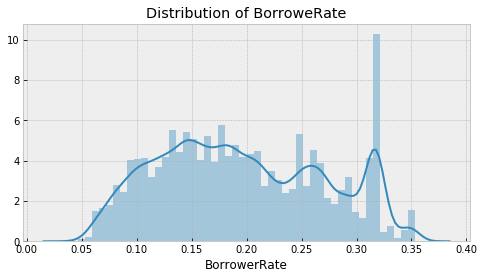

In [9]:
plt.figure(figsize=[8,4])
loan_data['BorrowerRate'].describe(), sns.distplot(loan_data['BorrowerRate']).set_title('Distribution of BorroweRate')

## BorrowerRate vs ProsperScore

> The ProsperScore and the BorrowerRate were included in each of both diagrams. The higher the ProsperScore, the better the rating of the borrower. The diagram shows that there is a slightly negativ correlation between the BorrowerRate and the ProsperScore. We can see that the majority of borrowers have a ProsperScore between 11-6 and a BorrowerRate from 0.075 - 0.20.

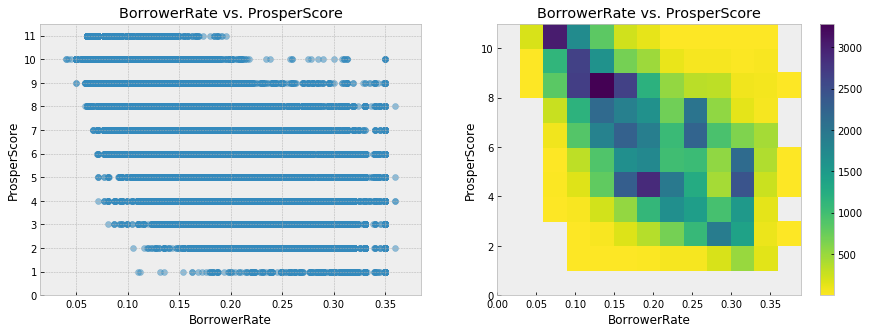

In [7]:
# scatter and heat plot for comparing BorrowerRate and ProsperScore
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan_data, x = 'BorrowerRate', y = 'ProsperScore', alpha =  0.5)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerRate vs. ProsperScore')
plt.xlabel('BorrowerRate')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan_data['BorrowerRate'].max()+0.05, 0.03)
bins_y = np.arange(0, loan_data['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan_data, x = 'BorrowerRate', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerRate vs. ProsperScore')
plt.xlabel('BorrowerRate')
plt.ylabel('ProsperScore');

## BorrowerRate vs ProsperRating vs ProsperScore

> This diagramm also underlines the insights from the diagrams before. It shows that BorrowerRate is positive correlated with ProsperRating and ProsperScore. The better the Rating and the Score, the lower the individual BorrowerRate.


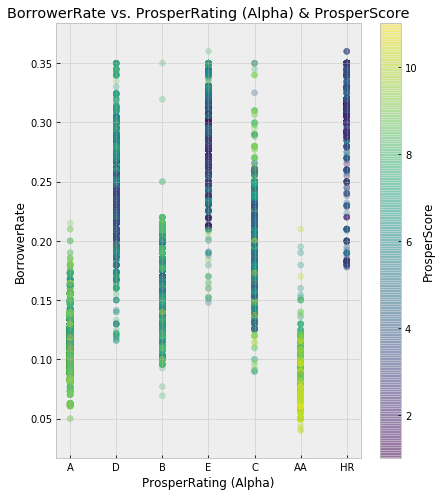

In [10]:
plt.figure(figsize=[15,8])
plt.subplot(1, 2, 2)
plt.scatter(data = loan_data, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerRate vs. ProsperRating (Alpha) & ProsperScore')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('BorrowerRate');